In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier


In [31]:
# Load the dataset
url = "https://github.com/sambhaduri/Titanic-Survival-prediction-ML/raw/main/train.csv"
data = pd.read_csv(url)


In [ ]:
# Explore the dataset
data.head()


In [ ]:
data.info()

In [32]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

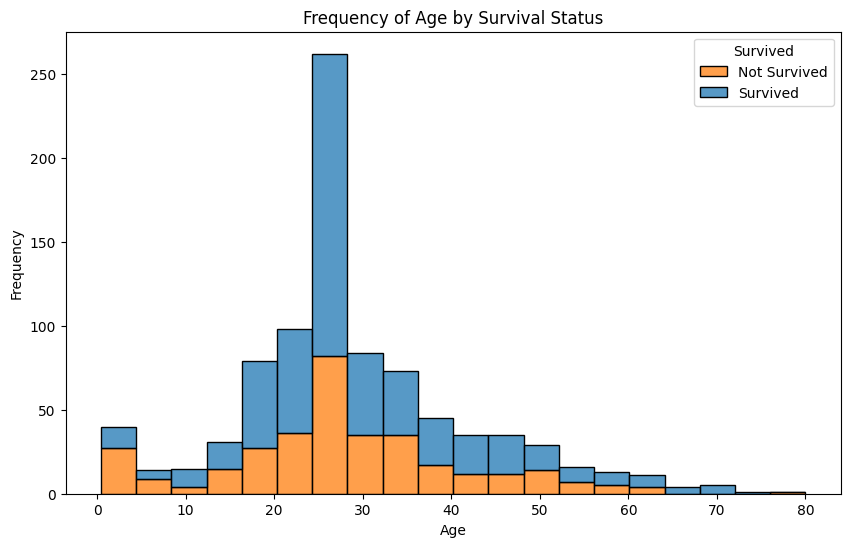

In [64]:
# Plot frequency distribution of Age by Survival Status
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Age', hue='Survived', multiple='stack', bins=20)
plt.title('Frequency of Age by Survival Status')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(title='Survived', labels=['Not Survived', 'Survived'])
plt.show()

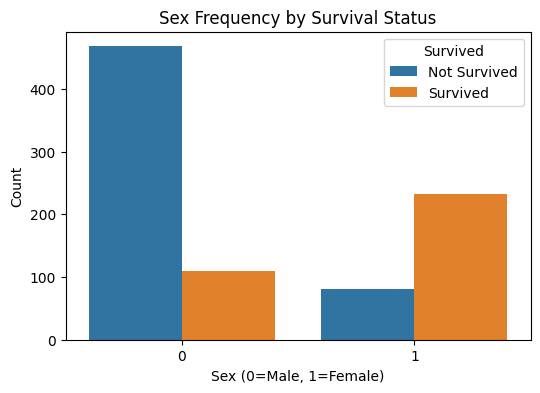

In [65]:
# Plot frequency of Sex by Survival Status
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Sex', hue='Survived')
plt.title('Sex Frequency by Survival Status')
plt.xlabel('Sex (0=Male, 1=Female)')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['Not Survived', 'Survived'])
plt.show()

In [33]:
# Missing values handle in 'Age' column test with mean, median, mode and as checked median worked best as mean is impacted by outliers like 80 years old passenger
data['Age'].fillna(data['Age'].median(), inplace=True)
data.isnull().sum()


/var/folders/5d/xxtbbnhj10zgpnbm6xw_26g00000gn/T/ipykernel_1179/3494598109.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [34]:
# Convert 'Sex' to numeric (0 = male, 1 = female)
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

# Fill missing values in 'Embarked' and encode as numeric
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
data['Embarked'] = data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Fill missing values in 'Cabin' and encode as the first letter (deck), then as numeric
data['Cabin'] = data['Cabin'].fillna('Unknown')
data['Cabin'] = data['Cabin'].apply(lambda x: x[0] if x != 'Unknown' else 'U')
data['Cabin'] = data['Cabin'].astype('category').cat.codes


/var/folders/5d/xxtbbnhj10zgpnbm6xw_26g00000gn/T/ipykernel_1179/2316147036.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)


             PassengerId  Survived    Pclass  ...      Fare     Cabin  Embarked
PassengerId     1.000000 -0.005007 -0.035144  ...  0.012658 -0.030939 -0.030467
Survived       -0.005007  1.000000 -0.338481  ...  0.257307 -0.301116  0.106811
Pclass         -0.035144 -0.338481  1.000000  ... -0.549500  0.746616  0.045702
Sex            -0.042939  0.543351 -0.131900  ...  0.182333 -0.123076  0.116569
Age             0.034212 -0.064910 -0.339898  ...  0.096688 -0.255783 -0.009165
SibSp          -0.057527 -0.035322  0.083081  ...  0.159651  0.041540 -0.059961
Parch          -0.001652  0.081629  0.018443  ...  0.216225 -0.032548 -0.078665
Fare            0.012658  0.257307 -0.549500  ...  1.000000 -0.523013  0.062142
Cabin          -0.030939 -0.301116  0.746616  ... -0.523013  1.000000 -0.034887
Embarked       -0.030467  0.106811  0.045702  ...  0.062142 -0.034887  1.000000

[10 rows x 10 columns]


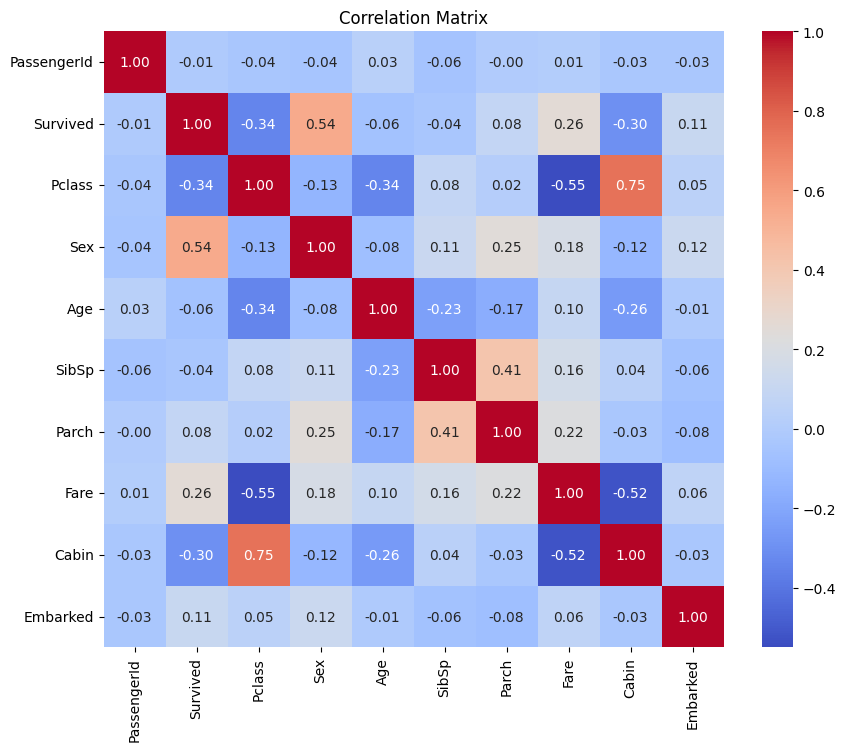

In [35]:
# Further data preprocessing and model training code would go here - correlation analysis

# Correlation matrix to check co-dependency between features
corr_matrix = data.corr(numeric_only=True)
print(corr_matrix)

# Visualizing the correlation matrix
plt.figure(figsize=(10, 8))
plt.title("Correlation Matrix")
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

In [22]:
# Correlation of features with the target
corr_with_target = data.corr(numeric_only=True)['Survived'].sort_values(ascending=False)
print(corr_with_target)

Survived       1.000000
Sex            0.543351
Fare           0.257307
Embarked       0.106811
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.064910
Cabin         -0.301116
Pclass        -0.338481
Name: Survived, dtype: float64


In [36]:
# Based on correlation analysis, selecting features for the model
#selected_features = ['Pclass', 'Sex', 'Fare', 'Embarked', 'Cabin', 'Age']
selected_features = ["Sex", "Fare", "Pclass", "Cabin"]
X = data[selected_features]
y = data['Survived']


In [57]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
model = RandomForestClassifier(n_estimators=500, max_depth=5, random_state=42)
model.fit(X, y)

# Define base models
#clf1 = LogisticRegression(max_iter=1000, random_state=42)
#clf2 = RandomForestClassifier(n_estimators=500, max_depth=5, random_state=42)
#clf3 = KNeighborsClassifier()
#clf4 = SVC(probability=True, random_state=42)
#clf5 = AdaBoostClassifier(random_state=42)

# Create a voting classifier
#voting_clf = VotingClassifier(
   # estimators=[
   #     ("lr", clf1), ("rf", clf2), ("knn", clf3)], voting="hard")

# Create AdaBoost classifier
#ada_clf = AdaBoostClassifier(random_state=42)

# Fit the classifier
#voting_clf.fit(X, y)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Train Accuracy:", accuracy_score(y_train, model.predict(X_train)))
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Train Accuracy: 0.848314606741573
Accuracy: 0.8100558659217877
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       105
           1       0.81      0.70      0.75        74

    accuracy                           0.81       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179



In [46]:
# Use the model to make predictions on new data

test_url = "https://github.com/sambhaduri/Titanic-Survival-prediction-ML/raw/main/test.csv"
test_data = pd.read_csv(test_url)
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
test_data.info()

In [47]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [48]:
# Preprocess the test data similarly
test_data["Age"].fillna(test_data["Age"].median(), inplace=True)
test_data.isnull().sum()

/var/folders/5d/xxtbbnhj10zgpnbm6xw_26g00000gn/T/ipykernel_1179/1850595947.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data["Age"].fillna(test_data["Age"].median(), inplace=True)


PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [49]:
# Convert 'Sex' to numeric (0 = male, 1 = female)
test_data["Sex"] = test_data["Sex"].map({"male": 0, "female": 1})
# Fill missing values in 'Embarked' and encode as numeric
test_data["Embarked"].fillna(test_data["Embarked"].mode()[0], inplace=True)
test_data["Embarked"] = test_data["Embarked"].map({"S": 0, "C": 1, "Q": 2})

# Fill missing values in 'Cabin' and encode as the first letter (deck), then as numeric
test_data["Cabin"] = test_data["Cabin"].fillna("Unknown")
test_data["Cabin"] = test_data["Cabin"].apply(lambda x: x[0] if x != "Unknown" else "U")
test_data["Cabin"] = test_data["Cabin"].astype("category").cat.codes


/var/folders/5d/xxtbbnhj10zgpnbm6xw_26g00000gn/T/ipykernel_1179/3827197564.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data["Embarked"].fillna(test_data["Embarked"].mode()[0], inplace=True)


In [60]:
# update test data preprocessing as per selected features
test_data["Fare"].fillna(test_data["Fare"].median(), inplace=True)
X_new = test_data[selected_features]
#predictions = ada_clf.predict(X_new)
# Predict on new data
predictions = (model.predict(X_new) > 0.5).astype(int).flatten()


/var/folders/5d/xxtbbnhj10zgpnbm6xw_26g00000gn/T/ipykernel_1179/1686329614.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data["Fare"].fillna(test_data["Fare"].median(), inplace=True)


In [61]:
# Create a CSV with PassengerId and survival prediction
output = pd.DataFrame(
    {"PassengerId": test_data["PassengerId"], "Survived": predictions}
)
output.to_csv("titanic_predictions.csv", index=False)
print("CSV file 'titanic_predictions.csv' created.")


CSV file 'titanic_predictions.csv' created.
